<a href="https://colab.research.google.com/github/modem0011/Machine-Learning/blob/master/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
housing=pd.read_csv("Housing.csv")

In [8]:
data=pd.DataFrame(housing)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
data["mainroad"]=data["mainroad"].map({"yes":1,"no":0})
data["guestroom"]=data["guestroom"].map({"yes":1,"no":0})
data["basement"]=data["basement"].map({"yes":1,"no":0})
data["hotwaterheating"]=data["hotwaterheating"].map({"yes":1,"no":0})
data["airconditioning"]=data["airconditioning"].map({"yes":1,"no":0})
data["prefarea"]=data["prefarea"].map({"yes":1,"no":0})

In [10]:
dummies=pd.get_dummies(data["furnishingstatus"])
dummies1=pd.get_dummies(data["furnishingstatus"],drop_first=True)

In [11]:
dummies1.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [13]:
data=pd.concat([data,dummies1],axis=1)
data.drop(["furnishingstatus"],axis=1,inplace=True)

In [14]:
data=(data-data.mean())/data.std()

In [15]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,-0.844113,-0.69579,-0.844113,-0.69579
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,-0.844113,-0.69579,-0.844113,-0.69579
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,1.182502,-0.69579,1.182502,-0.69579
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,-0.844113,-0.69579,-0.844113,-0.69579
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,-0.844113,-0.69579,-0.844113,-0.69579


In [18]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
import matplotlib.pyplot as plt


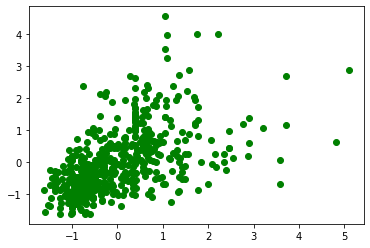

In [30]:
plt.scatter(data["area"],data["price"],color="green")
plt.show()

In [33]:
import numpy as np

In [34]:
x=np.array(housing["area"])
y=np.array(housing["price"])

In [35]:
def gradient(X,y,m_current=0,c_current=0,iters=1000,learning_rate=0.01):
  N=float(len(y))
  gd_df=pd.DataFrame(columns=['m_current','c_current','cost'])
  for i in range(iters):
    y_current=m_current * X +c_current
    loss=sum([data**2 for data in (y-y_current)])/N
    m_gradient=-(2/N)*sum(X*(y-y_current))
    c_gradient=-(2/N)*sum(y-y_current)
    m_current=m_current- (learning_rate*m_gradient)
    c_current=c_current-(learning_rate*c_gradient)
    gd_df.loc[i]=[m_current,c_current,loss]
  return gd_df

In [36]:
gradient(x,y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


,m_current,c_current,cost
0,5.344584e+08,9.533458e+04,2.621383e+13
1,-3.338104e+14,-5.505481e+10,8.920389e+24
2,2.084906e+20,3.438603e+16,3.479822e+36
3,-1.302186e+26,-2.147676e+22,1.357470e+48
4,8.133169e+31,1.341391e+28,5.295459e+59
...,...,...,...
995,NaN,NaN,NaN
996,NaN,NaN,NaN
997,NaN,NaN,NaN
998,NaN,NaN,NaN


In [38]:
a=gradient(x,y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


0      2.621383e+13
1      8.920389e+24
2      3.479822e+36
3      1.357470e+48
4      5.295459e+59
           ...     
995             NaN
996             NaN
997             NaN
998             NaN
999             NaN
Name: cost, Length: 1000, dtype: float64